In [373]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [374]:
Data = pd.read_csv('test_new.csv')

Data.head

<bound method NDFrame.head of                     name     energy   diag      pca1      pca2      pca3
0     acetaldehyde_0_015  38.145186  0.378  0.842622 -0.531091  0.067095
1     acetaldehyde_0_015   0.573634  0.005  0.463136  0.636858 -0.534280
2     acetaldehyde_0_015   0.580474  0.005  0.264667  0.540074  0.553770
3     acetaldehyde_0_015  37.980501  0.378  0.029347  0.105040  0.245169
4     acetaldehyde_0_015  75.370940  0.754  0.044385  0.049707  0.439767
...                  ...        ...    ...       ...       ...       ...
1878             toluene   0.581503  0.005 -0.032922  0.033523  0.093225
1879             toluene  38.148987  0.378 -0.031214  0.041654  0.110894
1880             toluene   0.580038  0.005 -0.025586 -0.013104  0.019307
1881             toluene   0.583238  0.005 -0.025052 -0.011829  0.024907
1882             toluene   0.583238  0.005 -0.022429 -0.016721  0.013654

[1883 rows x 6 columns]>

In [375]:
Data.info()
Data.describe().transpose()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    1883 non-null   object 
 1   energy  1883 non-null   float64
 2   diag    1883 non-null   float64
 3   pca1    1883 non-null   float64
 4   pca2    1883 non-null   float64
 5   pca3    1883 non-null   float64
dtypes: float64(5), object(1)
memory usage: 88.4+ KB


,count,mean,std,min,25%,50%,75%,max
energy,1883.0,24.416358,27.288977,0.354965,0.409214,0.582452,38.118049,75.461656
diag,1883.0,0.248627,0.277354,0.005000,0.005000,0.005000,0.378000,0.754000
pca1,1883.0,0.184568,0.229187,-0.687571,0.034178,0.068929,0.268753,0.870534
pca2,1883.0,0.109284,0.273241,-0.651034,0.025515,0.071592,0.194131,0.814977
pca3,1883.0,0.088417,0.280693,-0.828189,0.025299,0.097596,0.239532,0.849920


In [376]:
null_counts = Data.isna().sum()
null_counts

name      0
energy    0
diag      0
pca1      0
pca2      0
pca3      0
dtype: int64

<AxesSubplot: >

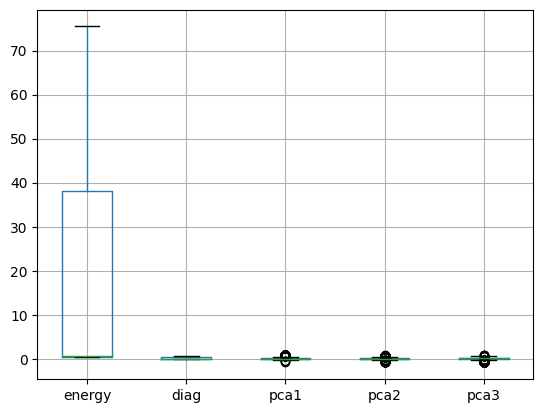

In [377]:
features = ['energy','diag','pca1', 'pca2', 'pca3']
Data.boxplot(features)

In [378]:

selected_features = ['diag','pca1','pca2','pca3']
X = Data[selected_features]

In [379]:
target =  ['energy']
y = Data[target]

In [380]:
from sklearn.preprocessing import MaxAbsScaler

max_abs_scaler = MaxAbsScaler()
X_scale = max_abs_scaler.fit_transform(X)
X_scale

array([[ 0.50132626,  0.96793692, -0.65166379,  0.07894272],
       [ 0.0066313 ,  0.53201368,  0.78144291, -0.62862387],
       [ 0.0066313 ,  0.30402833,  0.66268619,  0.65155544],
       ...,
       [ 0.0066313 , -0.02939116, -0.01607898,  0.02271626],
       [ 0.0066313 , -0.02877774, -0.01451452,  0.02930511],
       [ 0.0066313 , -0.02576465, -0.02051714,  0.01606504]])

In [381]:
# from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()
# X_scale = min_max_scaler.fit_transform(X)
# X_scale

In [382]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.reshaping.flatten import Flatten
from sklearn.model_selection import KFold

In [383]:
# define number of folds for cross-validation
n_splits = 5

In [384]:
# create KFold object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

In [385]:
# initialize list to store training and validation scores
train_scores = []
val_scores = []
test_score = []

In [386]:
# for train_index, val_index in kf.split(X_scale):
    
#     # split data into training and validation sets for this fold
#     X_train, X_val = X_scale[train_index], X_scale[val_index]
#     Y_train, Y_val = y.iloc[train_index], y.iloc[val_index]
    
#     # build model architecture
#     model = Sequential()
#     model.add(Dense(units = 48, input_dim = 4))
#     model.add(Dense(units = 48, activation='tanh'))
#     model.add(Dense(units = 32, activation='tanh'))
#     model.add(Dense(units = 32, activation='tanh'))
#     model.add(Dense(units = 16, activation='tanh'))
#     model.add(Flatten())
#     model.add(Dense(units = 1))
    
#     # compile model
#     model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
#     # fit model on training set for this fold
#     hist = model.fit(
#         X_train, Y_train,
#         batch_size=32,
#         epochs = 400,
#         validation_data=(X_val, Y_val),
#         verbose=0
#     )
    
#     # evaluate model on training and validation sets for this fold
#     train_loss, train_mae = model.evaluate(X_train, Y_train, verbose=0)
#     val_loss, val_mae = model.evaluate(X_val, Y_val, verbose=0)
    
#     # store training and validation scores for this fold
#     train_scores.append(train_mae)
#     val_scores.append(val_mae)

In [387]:
#Using 10% for testing set
from sklearn.model_selection import train_test_split
for fold, (train_index, val_index) in enumerate(kf.split(X_scale)):
    
    # Split data into training and validation sets for this fold
    X_train, X_val = X_scale[train_index], X_scale[val_index]
    Y_train, Y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Split validation set into validation and testing sets
    X_val, X_test, Y_val, Y_test = train_test_split(X_val, Y_val, test_size=0.1, random_state=42)
    
    # Build model architecture
    model = Sequential()
    model.add(Dense(units = 48, input_dim = 4))
    model.add(Dense(units = 48, activation='tanh'))
    model.add(Dense(units = 32, activation='tanh'))
    model.add(Dense(units = 32, activation='tanh'))
    model.add(Dense(units = 16, activation='tanh'))
    model.add(Flatten())
    model.add(Dense(units = 1))
    
    # Compile model
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    # Fit model on training set for this fold
    hist = model.fit(
        X_train, Y_train,
        batch_size=32,
        epochs=400,
        validation_data=(X_val, Y_val),
        verbose=0
    )
    
    # Evaluate model on training, validation, and testing sets for this fold
    train_loss, train_mae = model.evaluate(X_train, Y_train, verbose=0)
    val_loss, val_mae = model.evaluate(X_val, Y_val, verbose=0)
    test_loss, test_mae = model.evaluate(X_test, Y_test, verbose=0)
    
    # Store training, validation, and testing scores for this fold
    train_scores.append(train_mae)
    val_scores.append(val_mae)
    test_score.append(test_mae)

In [388]:
# print mean training and validation scores over all folds
print(f"Mean training MAE: {np.mean(train_scores):.3f}")
print(f"Mean validation MAE: {np.mean(val_scores):.3f}")
print(f"Mean Testing MAE: {np.mean(test_score):.3f}")


Mean training MAE: 0.254
Mean validation MAE: 0.278
Mean Testing MAE: 0.330


In [389]:
train_accuracy = 1 - hist.history['mae'][-1]
print(f"Training accuracy: {train_accuracy}")

Training accuracy: 0.8802691623568535


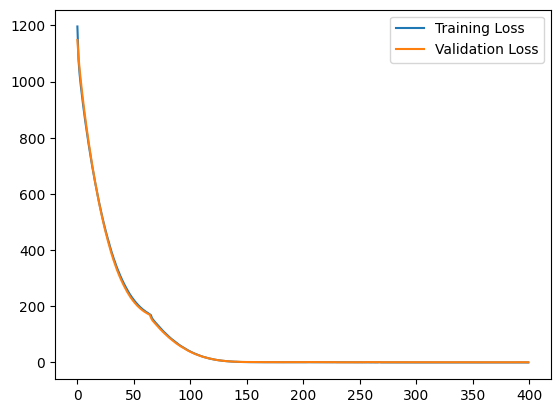

In [390]:
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [397]:
print("Generate a prediction")
prediction = model.predict(X_test)
print("Prediction: ", prediction[:10])

Generate a prediction
2/2 [==============================] - 0s 13ms/step
Prediction:  [[ 0.53686047]
 [ 0.648159  ]
 [75.31182   ]
 [35.6692    ]
 [ 0.43710995]
 [35.785233  ]
 [35.505424  ]
 [ 0.41057777]
 [35.239548  ]
 [37.817345  ]]


In [398]:
np.array(Y_test[:10])

array([[ 0.5768481],
       [ 0.5701934],
       [75.3956461],
       [35.5799758],
       [ 0.4133684],
       [35.5340584],
       [35.512149 ],
       [ 0.4081239],
       [35.5312335],
       [37.8749779]])